## Loading Data
 

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!git clone https://github.com/kaggle/docker-python

Cloning into 'docker-python'...
remote: Enumerating objects: 5676, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 5676 (delta 37), reused 17 (delta 11), pack-reused 5612
Receiving objects: 100% (5676/5676), 1.93 MiB | 20.57 MiB/s, done.
Resolving deltas: 100% (3287/3287), done.


In [14]:
%cd content/mnt/

/content/mnt


In [16]:
df = pd.read_csv('insurance.csv')


## Exploring Data
 

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.shape

(1338, 7)

In [19]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

## Split Data

In [23]:
X = df.drop('charges',axis=1)
y = df['charges']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


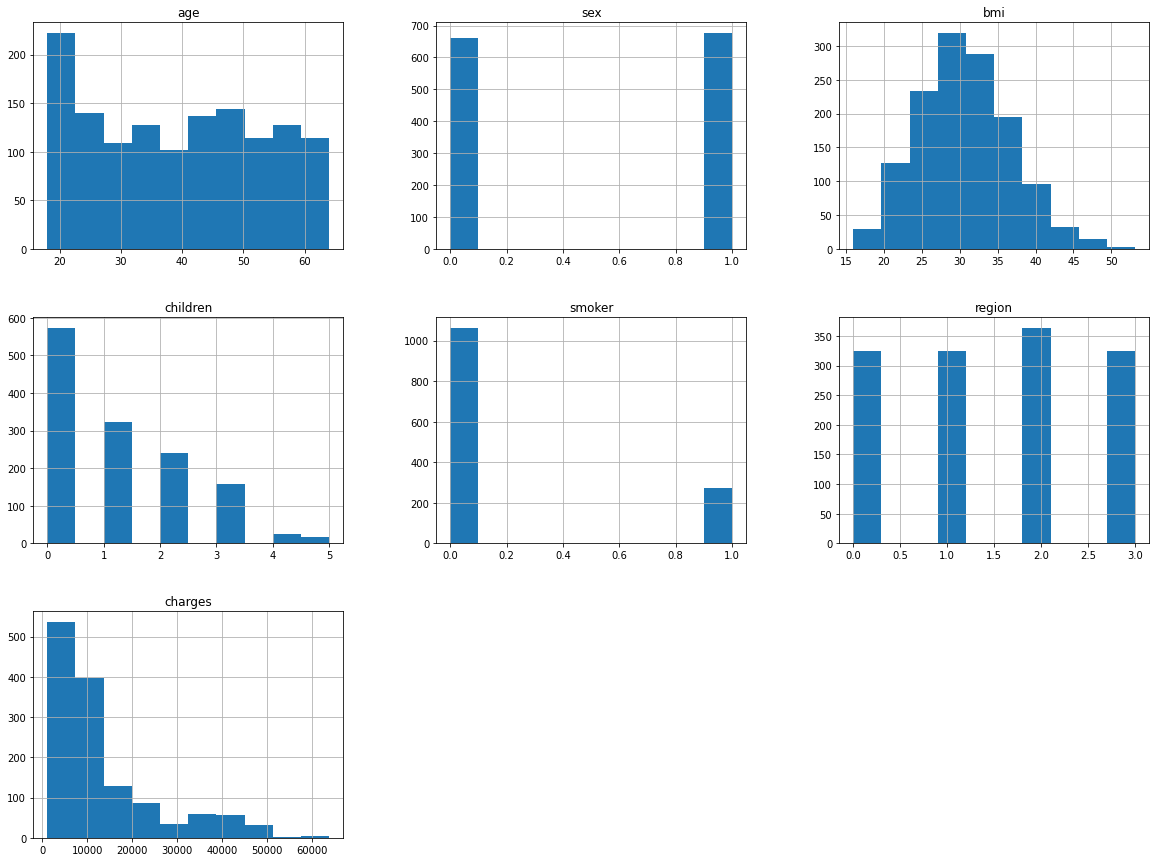

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

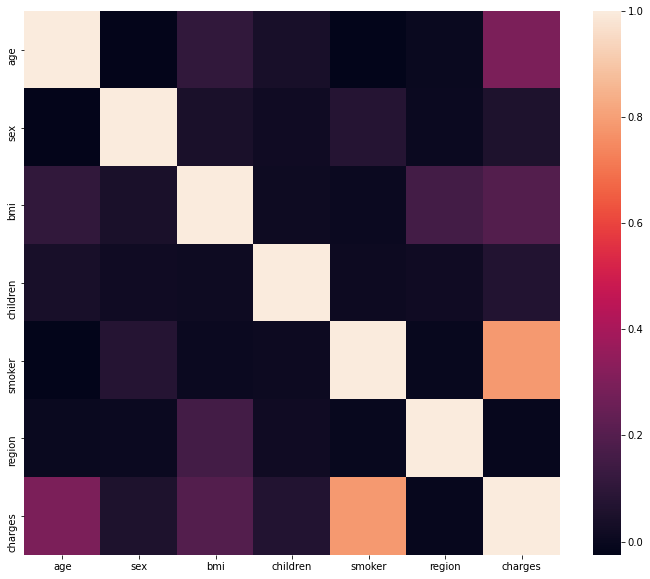

In [26]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

In [27]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


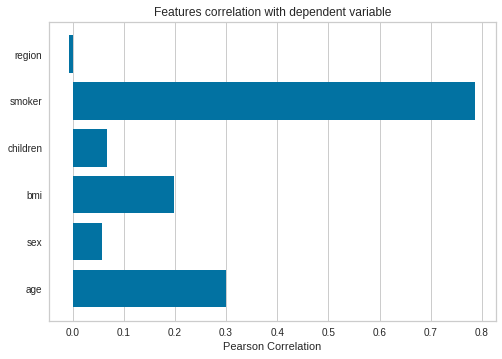

In [28]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(X, y)

visualizer.poof()

### Show Outlier Data 

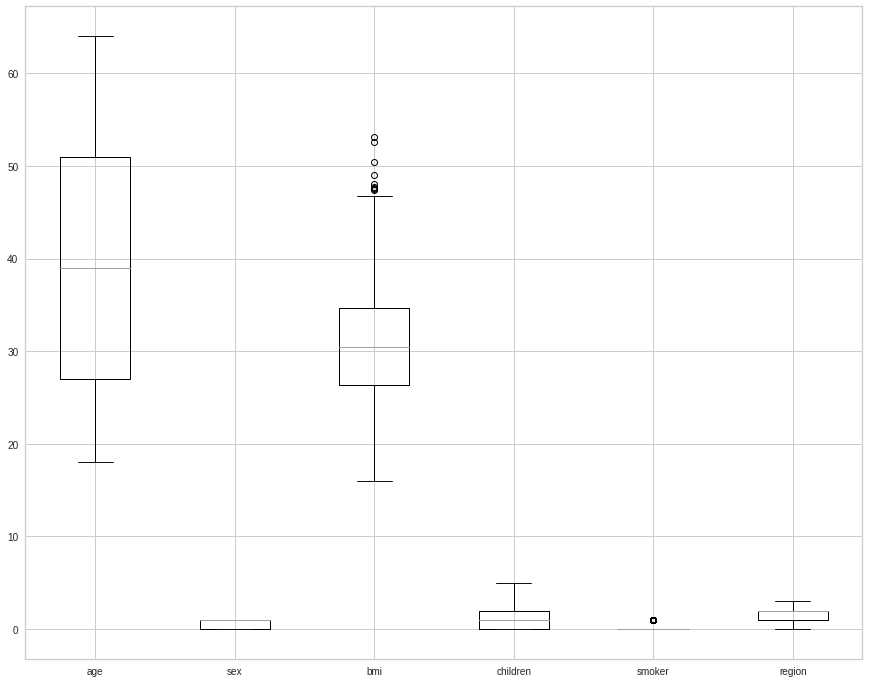

In [29]:
boxplot = X.boxplot(figsize=(15, 12))

In [30]:
df.loc[df['bmi'] > 45]                                         

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
292,25,1,45.54,2,1,2,42112.23560
401,47,1,47.52,1,0,2,8083.91980
438,52,0,46.75,5,0,2,12592.53450
454,32,1,46.53,2,0,2,4686.38870
543,54,0,47.41,0,1,2,63770.42801
547,54,0,46.70,2,0,3,11538.42100
549,43,0,46.20,0,1,2,45863.20500
582,39,1,45.43,2,0,2,6356.27070


In [31]:
mean_bmi = X['bmi'].mean()
mean_bmi

30.663396860986538

In [32]:
for index, row in X.iterrows():
    
    if row['bmi']  >46:
        X.at[index, 'bmi'] = mean_bmi

In [33]:
# X[X['bmi'] > 45].bmi = mean_bmi

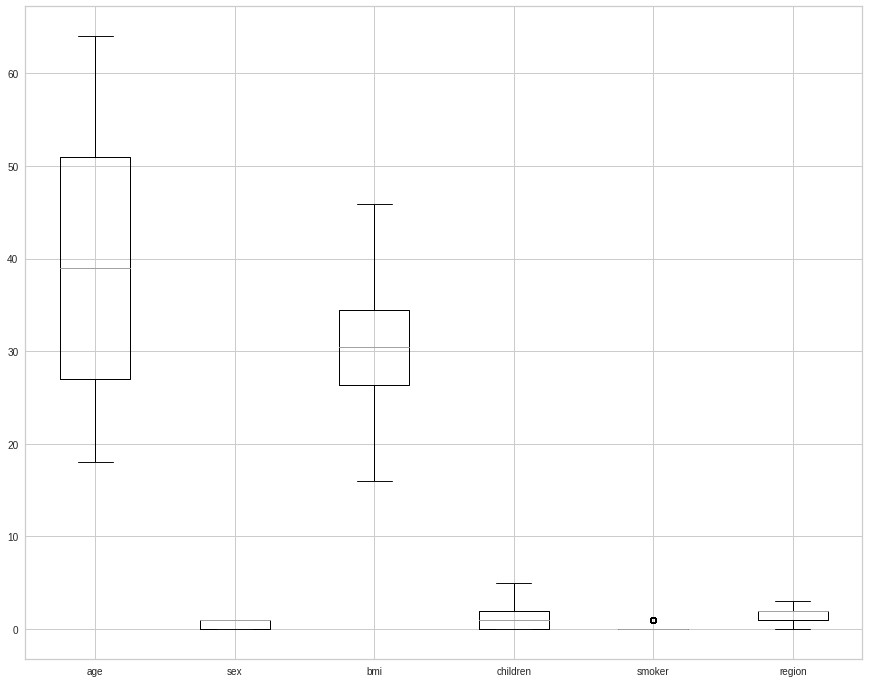

In [34]:
boxplot = X.boxplot(figsize=(15, 12))

# Model 1 -> LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1 = make_pipeline(StandardScaler(), LinearRegression())

In [36]:
model_1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
model_1.score(X_test,y_test)

0.7602640802497019

In [38]:
from sklearn.metrics import mean_absolute_error
y_pred = model_1.predict(X_test)
mean_absolute_error(y_test, y_pred)

4204.415654724193

# Model 2 -> Lasso

In [39]:
from sklearn.linear_model import Lasso
model_2 = make_pipeline(StandardScaler(), Lasso())

In [40]:
model_2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [41]:
model_2.score(X_test,y_test)

0.7602651904580856

In [42]:
y_pred = model_2.predict(X_test)
mean_absolute_error(y_test, y_pred)

4204.260373504683

#  Model 3 -> RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
model_3 =make_pipeline(StandardScaler(), RandomForestRegressor()) 

In [44]:
model_3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [45]:
model_3.score(X_test,y_test)

0.8466519451380975

In [46]:
y_pred = model_3.predict(X_test)
mean_absolute_error(y_test, y_pred)

2557.2795100794133